In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cali_house_prices = pd.read_csv("data/california_housing_prices.csv")
cali_house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# median_income is initially measured in 10s of thousands, convert to dollars
cali_house_prices["median_income"] = cali_house_prices["median_income"] * 10000

In [4]:
def convert_dollars_2022(dollars):
    # According to https://www.officialdata.org/us/inflation/1990?endYear=2022&amount=1
    conversion = 2.24
    return dollars * conversion

In [6]:
cali_house_prices["median_income_2022_dollars"] = cali_house_prices["median_income"].apply(convert_dollars_2022)

In [8]:
cali_house_prices["median_house_value_2022_dollars"] = cali_house_prices["median_house_value"].apply(convert_dollars_2022)

In [9]:
cali_house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_2022_dollars,median_house_value_2022_dollars
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,186484.48,1013824.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,185951.36,803040.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,162565.76,788704.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,126405.44,764512.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,86154.88,766528.0


In [10]:
cali_house_prices.drop(["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis=1, inplace=True)
cali_house_prices.rename(columns={
    "median_house_value": "value"
}, inplace=True)

cali_house_prices

,median_income,value,median_income_2022_dollars,median_house_value_2022_dollars
0,83252.0,452600.0,186484.48,1013824.0
1,83014.0,358500.0,185951.36,803040.0
2,72574.0,352100.0,162565.76,788704.0
3,56431.0,341300.0,126405.44,764512.0
4,38462.0,342200.0,86154.88,766528.0
...,...,...,...,...
20635,15603.0,78100.0,34950.72,174944.0
20636,25568.0,77100.0,57272.32,172704.0
20637,17000.0,92300.0,38080.00,206752.0
20638,18672.0,84700.0,41825.28,189728.0


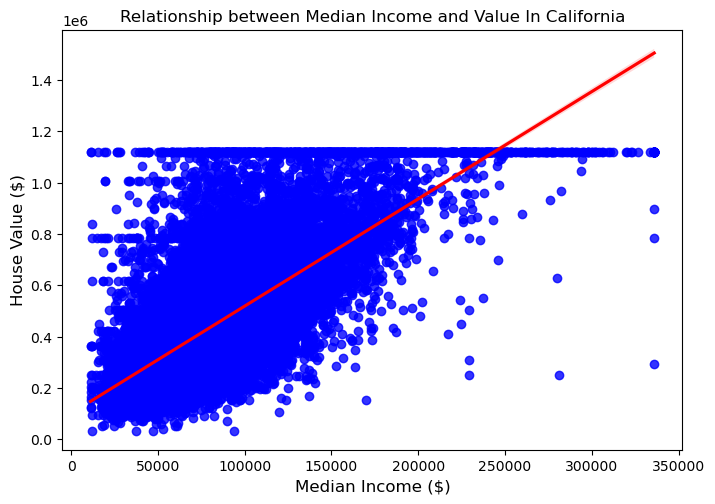

In [12]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(8, 12))
                     

# First subplot
plt.subplot(2, 1, 1)  # (rows, columns, index)
sns.regplot(data=cali_house_prices, x='median_income_2022_dollars', y='median_house_value_2022_dollars', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.ticklabel_format(style='plain', axis='x')
plt.title('Relationship between Median Income and Value In California')
plt.xlabel('Median Income ($)', fontsize=12)  # Customize x-axis label
plt.ylabel('House Value ($)', fontsize=12)  # Customize y-axis label
                     
# plt.ylim(0, 510000)
plt.show()